<a href="https://colab.research.google.com/github/Emillka/Data-Science-ML/blob/main/Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np




170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


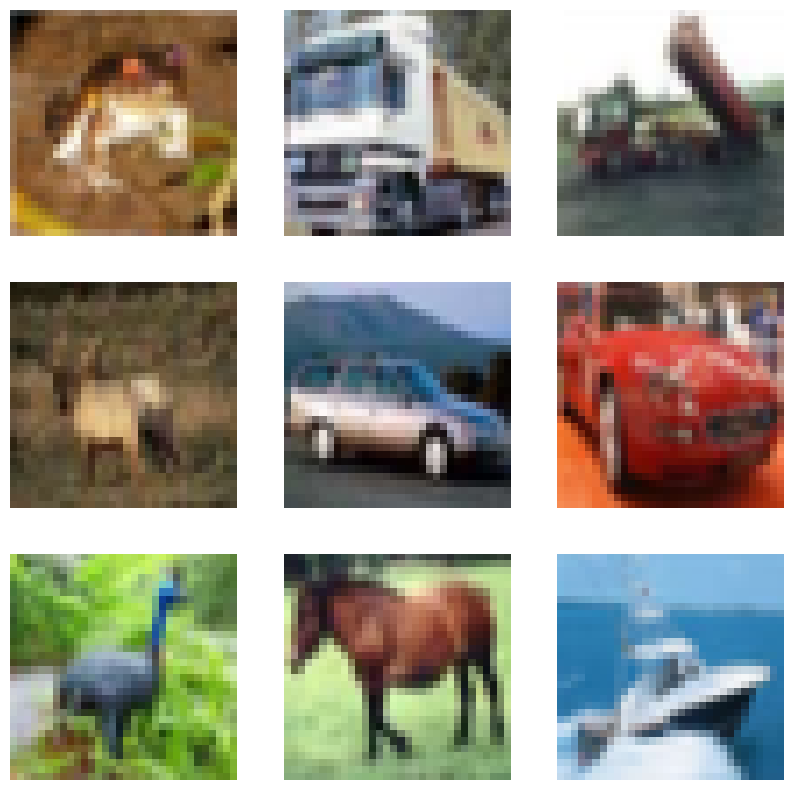

In [3]:

# Loading data (compare train/test)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print example images from train set
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()


In [4]:
# Data normalization
x_train, x_test = x_train / 255.0, x_test / 255.0


In [5]:
#Create model - CNN


# Model CNN
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Dropout, to avoid overlifting
    Dense(10, activation='softmax')
])

# Create model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
#Train model

model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 89ms/step - accuracy: 0.2637 - loss: 1.9555 - val_accuracy: 0.5008 - val_loss: 1.3722
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.4655 - loss: 1.4772 - val_accuracy: 0.5365 - val_loss: 1.2784
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 83ms/step - accuracy: 0.5352 - loss: 1.3066 - val_accuracy: 0.5845 - val_loss: 1.1612
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.5795 - loss: 1.2040 - val_accuracy: 0.6216 - val_loss: 1.0614
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.6026 - loss: 1.1278 - val_accuracy: 0.6438 - val_loss: 1.0009
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 85ms/step - accuracy: 0.6293 - loss: 1.0692 - val_accuracy: 0.6717 - val_loss: 0.9269
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.6495 - loss: 1.0066 - val_accuracy: 0.6868 - val_loss: 0.8976
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.6670 - loss: 0.9609 - 

In [7]:
#Evaluation

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6942 - loss: 0.8845
Test accuracy: 0.6899999976158142


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


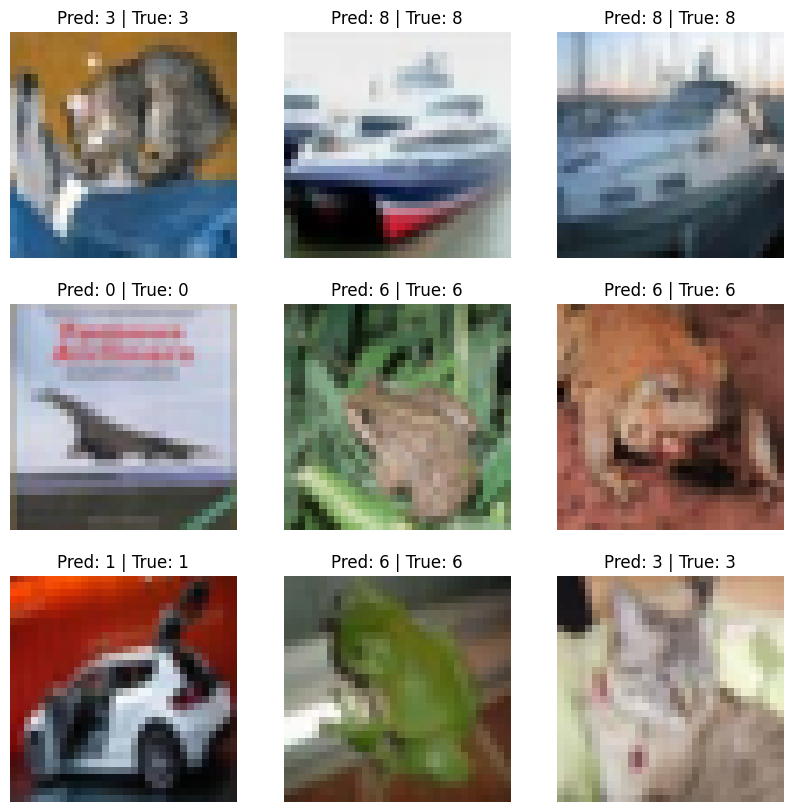

In [8]:
#Prediction and visualization

predictions = model.predict(x_test)

# Wyświetlanie przykładowych obrazów z etykietami przewidywanymi przez model
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {predictions[i].argmax()} | True: {y_test[i][0]}")
    plt.axis('off')
plt.show()


In [9]:
model.save('cifar10_model.h5')


In [10]:
#Accuracy


test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6942 - loss: 0.8845
Test Loss: 0.8934038877487183
Test Accuracy: 0.6899999976158142


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


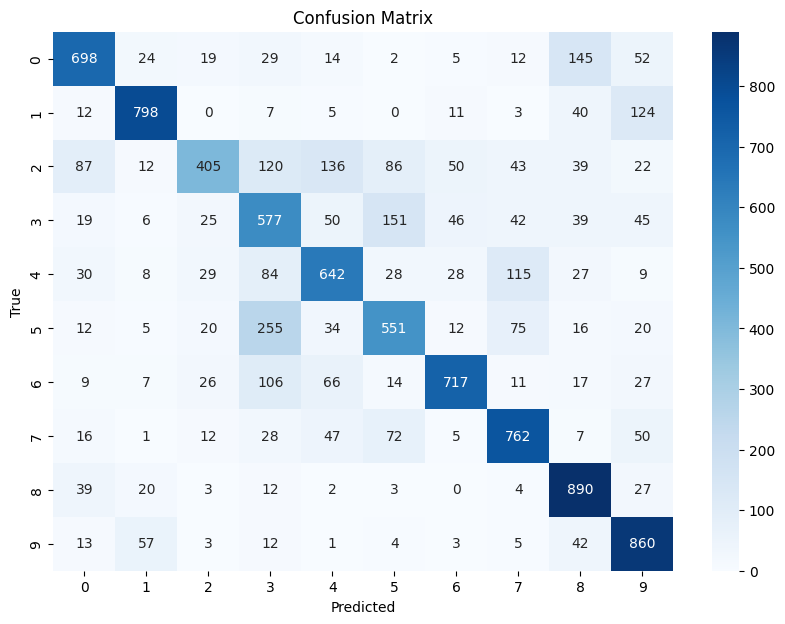

In [11]:
#Confusion matrix


y_pred = np.argmax(model.predict(x_test), axis=1)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [12]:


# Generate metric report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1000
           1       0.85      0.80      0.82      1000
           2       0.75      0.41      0.53      1000
           3       0.47      0.58      0.52      1000
           4       0.64      0.64      0.64      1000
           5       0.60      0.55      0.58      1000
           6       0.82      0.72      0.76      1000
           7       0.71      0.76      0.74      1000
           8       0.71      0.89      0.79      1000
           9       0.70      0.86      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [15]:
# classification report calculation
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  # Define class_names
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)


for i, class_name in enumerate(class_names):
    print(f"Class {class_name} (label {i}):")
    print(f"  Precision: {report[class_name]['precision']:.2f}")
    print(f"  Recall: {report[class_name]['recall']:.2f}")
    print(f"  F1-Score: {report[class_name]['f1-score']:.2f}")
    print()

Class airplane (label 0):
  Precision: 0.75
  Recall: 0.70
  F1-Score: 0.72

Class automobile (label 1):
  Precision: 0.85
  Recall: 0.80
  F1-Score: 0.82

Class bird (label 2):
  Precision: 0.75
  Recall: 0.41
  F1-Score: 0.53

Class cat (label 3):
  Precision: 0.47
  Recall: 0.58
  F1-Score: 0.52

Class deer (label 4):
  Precision: 0.64
  Recall: 0.64
  F1-Score: 0.64

Class dog (label 5):
  Precision: 0.60
  Recall: 0.55
  F1-Score: 0.58

Class frog (label 6):
  Precision: 0.82
  Recall: 0.72
  F1-Score: 0.76

Class horse (label 7):
  Precision: 0.71
  Recall: 0.76
  F1-Score: 0.74

Class ship (label 8):
  Precision: 0.71
  Recall: 0.89
  F1-Score: 0.79

Class truck (label 9):
  Precision: 0.70
  Recall: 0.86
  F1-Score: 0.77



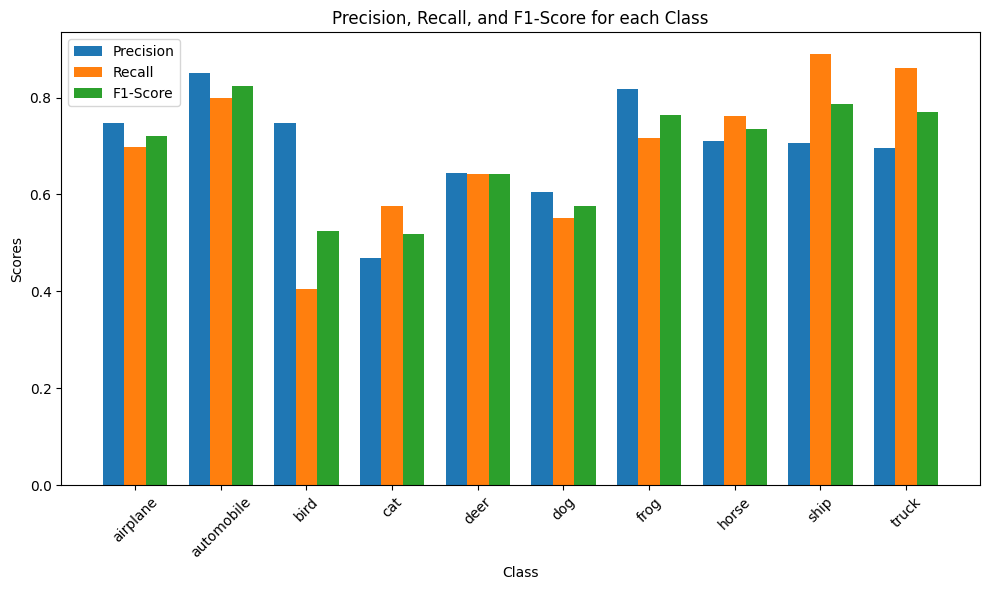

In [16]:
# Visualization
precision_values = [report[class_name]['precision'] for class_name in class_names]
recall_values = [report[class_name]['recall'] for class_name in class_names]
f1_values = [report[class_name]['f1-score'] for class_name in class_names]

#Create chart
x = np.arange(len(class_names))  # Oś X dla nazw klas
width = 0.25  # Szerokość słupków


fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, precision_values, width, label='Precision')
rects2 = ax.bar(x, recall_values, width, label='Recall')
rects3 = ax.bar(x + width, f1_values, width, label='F1-Score')

# Add label and title
ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score for each Class')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45)
ax.legend()


plt.tight_layout()
plt.show()